# Pi Day 2019
- Code By Michael Sherif Naguib
- license: MIT open source
- Date: 3/14/19
- @University of Tulsa
- Description: code that uses pi and visually displays some aspect....

In [164]:
#imports
import numpy as np, pandas as pd, datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import inferno, viridis
from numba import jit
import numpy.random
from colorcet import palette
import math
from decimal import *
import bokeh.plotting as bp
from datashader.bokeh_ext import InteractiveImage

In [151]:
#Get Pi Data: 10 Million Digits (after the 3.) courtesy of https://introcs.cs.princeton.edu/java/data/pi-10million.txt
pi_txt=""
#with open("pi_data_ten_mil.txt","r") as pi_data_file:
#    pi_txt = pi_txt.join(list(pi_data_file.readlines()))
#Get even bigger Pi Data: 1 Billion Digits! courtesy of stuff.mit.edu
with open("pi-billion.txt","r") as pi_data_file:
    pi_txt = pi_txt.join(list(pi_data_file.readlines()))

In [3]:
#setup
numpy.random.seed(29)
palette["viridis"]=viridis
palette["inferno"]=inferno

In [183]:
#Plotting Function (modified from Chaotic Attractor Code: all credit to  http://datashader.org/topics/strange_attractors.html )
def args(name):
    """Return a list of available argument lists for the given type of attractor"""
    return [v[1:] for v in vals if v[0]==name]
def plot(x,y, cmap=inferno, label=True):
    #Label for the graph
    lab =label if label else None
    #put the data in the proper format
    df  = pd.DataFrame(dict(x=np.array(x),y=np.array(y)))
    #setup a plot
    cvs = ds.Canvas(plot_width = 500, plot_height = 500)
    agg = cvs.points(df, 'x', 'y')
    img = tf.shade(agg, cmap=cmap, name=lab)  
    return img

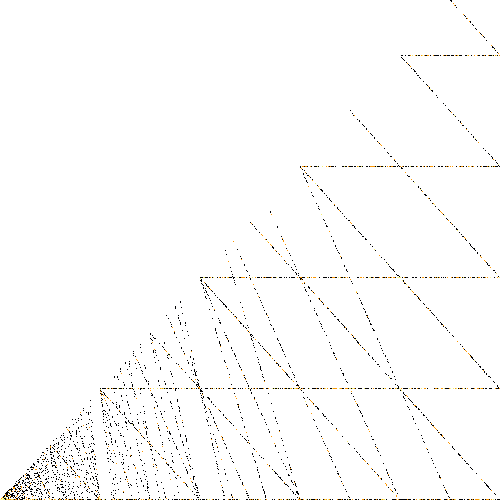

In [184]:
#calculation 1: modulus of digits of pi by natural numbers: Yn =  (nth Digit of pi)%(Xn)
#generate Data
def calc1(n):
    x = []
    y=[]
    for indx in range(1,n):#Must be 1 bc mod by 0 is error
        x.append(indx)
        y.append(1000*int(pi_txt[indx])%indx)
    return (x,y)

#Generate Data and Plot
data = calc1(5000)
plot(data[0],data[1])

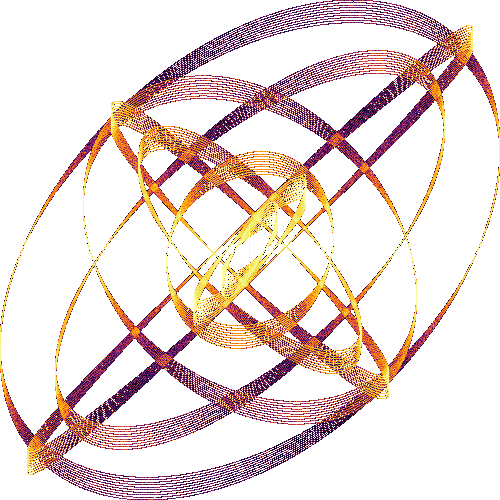

In [185]:
#calculation : parametric x(n)= s*cos(n)*p_n   y(n) = s*sin(n + p_n)*(p_(n+2)) 
#              where p_n is the nth digit of pi p_(n+k)   digit at location n+k
#              s is a scaling factor
#generate Data

def calc2(n):
    x=[]
    y=[]
    s=1000#scaling factor
    for indx in range(1,n):
        p= int(pi_txt[indx])
        x.append(s*math.cos(indx)*p)
        y.append(s*math.sin(indx + p)*int(pi_txt[indx:indx+2]))
    return (x,y)

#Generate Data and Plot
data = calc2(1000000)
plot(data[0],data[1])

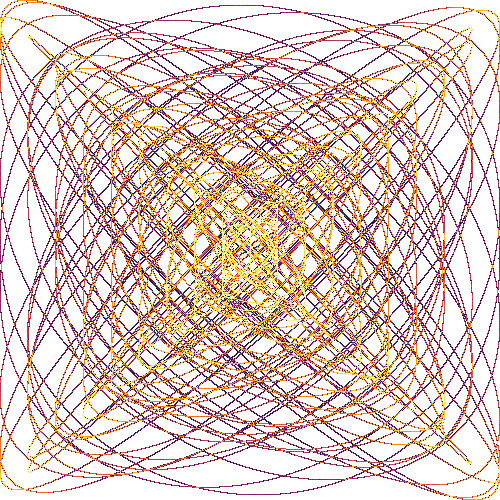

In [186]:
#calculation : parametric x(n)= s*cos(n)*p_n*10   y(n) = s*sin(n + p_n)*(p_(n+2)) 
#              where p_n is the nth digit of pi p_(n+k)   digit at location n+k
#              s is a scaling factor
#generate Data
def calc2(n):
    x=[1]
    y=[1]
    s=1000#scaling factor
    for indx in range(1,n):
        p= int(pi_txt[indx])
        p2= int(pi_txt[indx:indx+2])
        x.append(p*10*math.cos(indx+p2))
        y.append(p2*math.sin(indx+p))
    return (x,y)

#Generate Data and Plot
data = calc2(10000000)
plot(data[0],data[1])

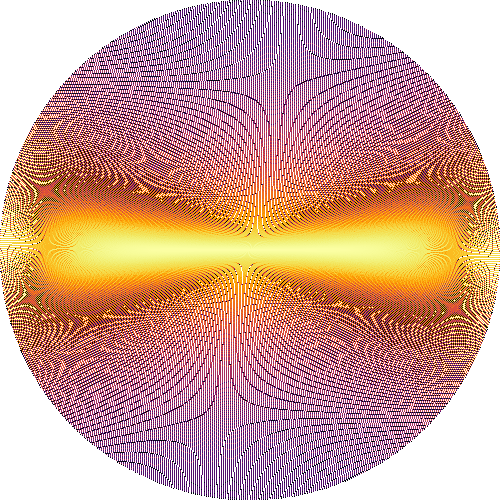

In [230]:
#calculation : 
#generate Data
def calc3(n):
    x=[]
    y=[]
    s=1000#scaling factor
    for indx in range(1,n):
        p= int(pi_txt[indx]) 
        p2= int(pi_txt[indx+1:indx+2])
        xf=indx
        x.append(xf)
        y.append(yf)
    return (x,y)

#Generate Data and Plot
data = calc3(1000000)
plot(data[0],data[1])